# Bank Data

**Step 1: Import Libraries**

In [2]:
# Import necessary libraries for data manipulation, visualization, and model building
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

**Step 2: Load Data**

In [3]:
# Load the bank dataset

data=pd.read_csv('BankRecords.csv')
data.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


**Step 3: Data Overview**

In [4]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

**Step 4: Data Cleaning**

In [5]:
# Drop unnecessary columns

data=data.drop(["ID","Sort Code"],axis=1)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience(Years)'}>],
       [<Axes: title={'center': "Income(Thousands's)"}>,
        <Axes: title={'center': 'Family'}>],
       [<Axes: title={'center': 'Credit Score'}>,
        <Axes: title={'center': "Mortgage(Thousands's)"}>]], dtype=object)

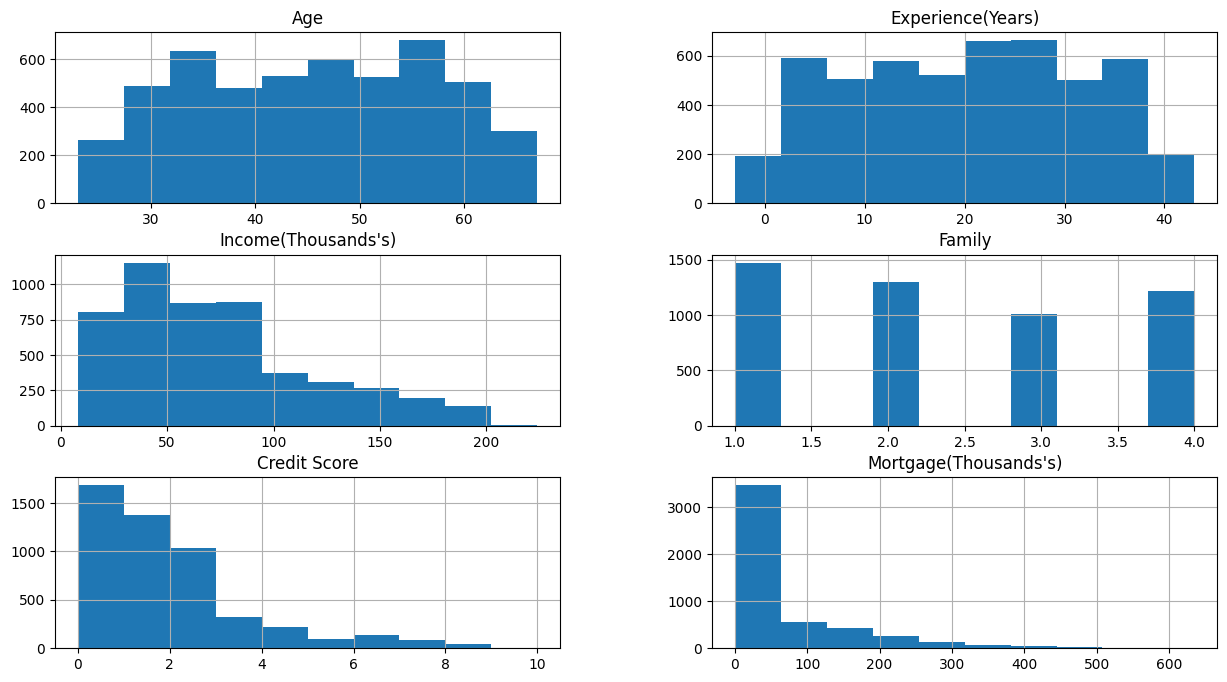

In [6]:
 data.hist(figsize=(15,8))

**Step 5: Encode Categorical Variables**

In [7]:
# Convert categorical variables to numeric using Label Encoding

categorical_cols= data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [8]:
data.head()

,Age,Experience(Years),Income(Thousands's),Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0
4,35,8,45,4,1.0,0,0,0,0,0,0,1


**Step 6: Feature Engineering**

<Axes: >

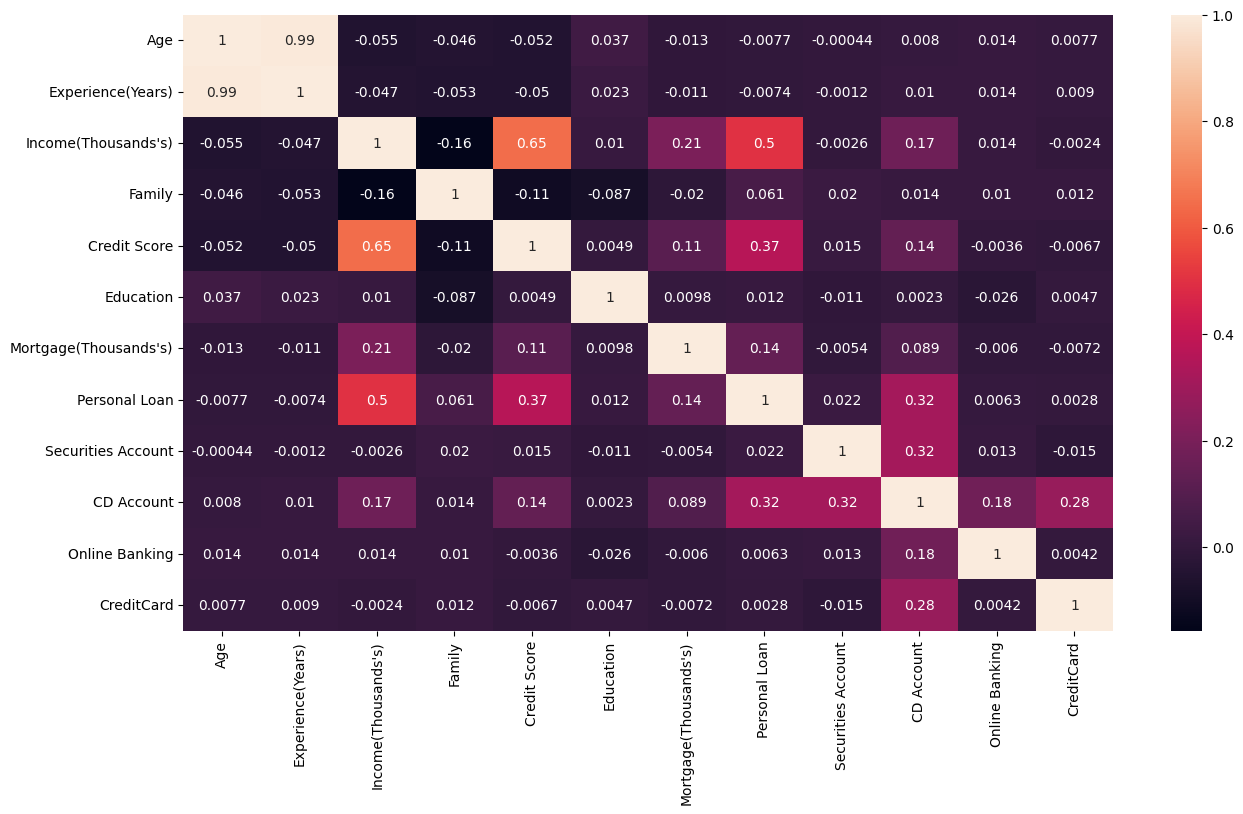

In [9]:
# Visualize the correlation matrix using a heatmap

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

In [10]:
# Create new features based on existing data

# Income per family member
data['Income_per_Family_Member'] = data['Income(Thousands\'s)'] / (data['Family'] + 1e-6)  # Avoid division by zero

# Credit Score and Income interactions
data['CreditScore_Income'] = data['Credit Score'] * data['Income(Thousands\'s)']
data['CreditScore_Income_Ratio'] = data['Credit Score'] / (data['Income(Thousands\'s)'] + 1e-6)  # Avoid division by zero

# Mortgage to Income ratio
data['Mortgage_Income_Ratio'] = data['Mortgage(Thousands\'s)'] / (data['Income(Thousands\'s)'] + 1e-6)  # Avoid division by zero
data['Mortgage_CreditScore'] = data['Mortgage(Thousands\'s)'] * data['Credit Score']


data.head()


,Age,Experience(Years),Income(Thousands's),Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard,Income_per_Family_Member,CreditScore_Income,CreditScore_Income_Ratio,Mortgage_Income_Ratio,Mortgage_CreditScore
0,25,1,49,4,1.6,1,0,0,1,0,0,0,12.249997,78.4,0.032653,0.0,0.0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,11.333330,51.0,0.044118,0.0,0.0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,10.999989,11.0,0.090909,0.0,0.0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,99.999900,270.0,0.027000,0.0,0.0
4,35,8,45,4,1.0,0,0,0,0,0,0,1,11.249997,45.0,0.022222,0.0,0.0


<Axes: >

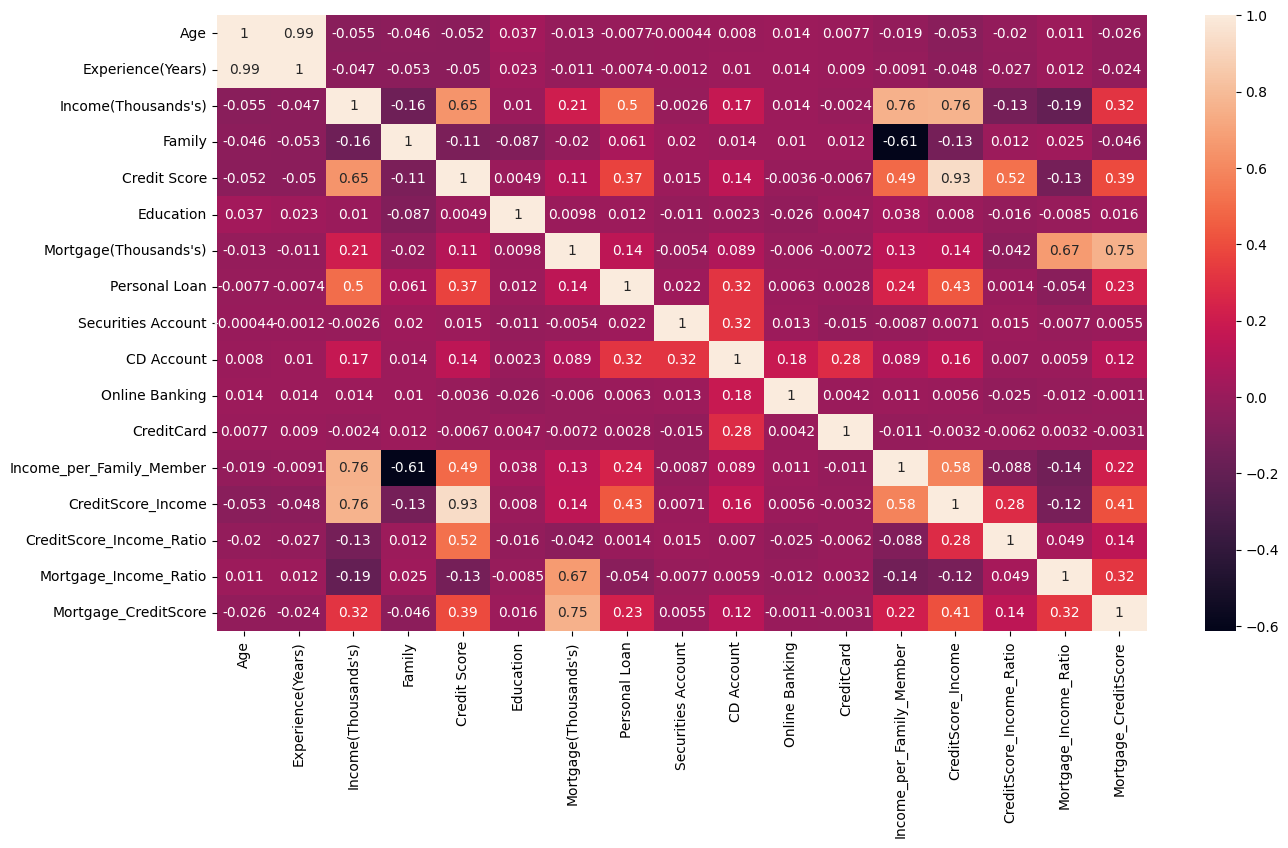

In [11]:
# Visualize the updated correlation matrix after feature engineering

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

In [12]:
# Drop columns that are less relevant for the model

data=data.drop(["Age","Experience(Years)","Education","Securities Account",'Online Banking','CreditCard'],axis=1)

<Axes: >

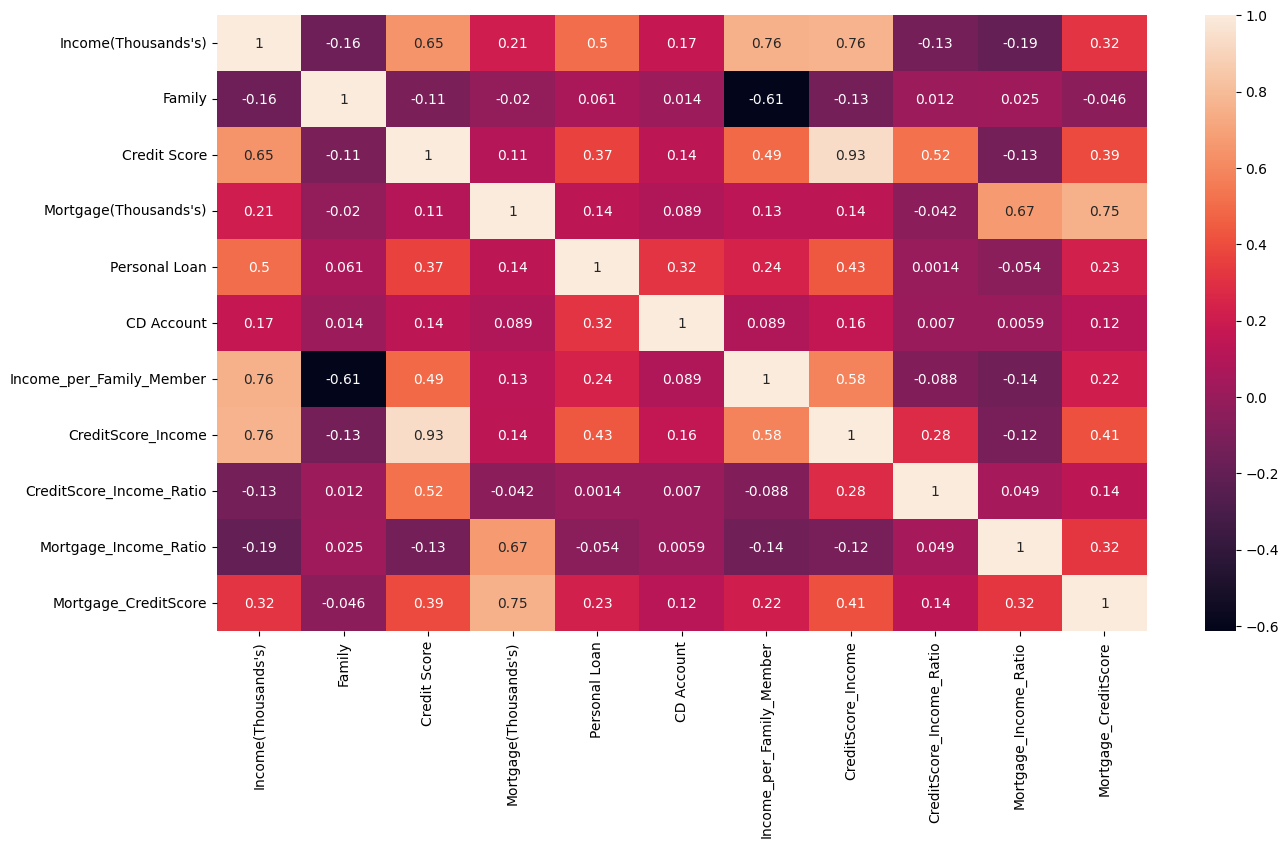

In [13]:
# Visualize the updated correlation matrix after droping less relevant columns

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

**Step 7: Split Data into Training and Testing Sets**

In [14]:
# Define features (X) and target (y), then split the data

X=data.drop(["Income(Thousands's)"],axis=1)
y=data["Income(Thousands's)"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Step 8: Linear Regression Model**

In [15]:
# Train and evaluate a Linear Regression model

linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [16]:
linear_reg.score(x_test,y_test)

0.8845197211755831

**Step 9: Decision Tree Regressor**

In [17]:
# Train and evaluate a Decision Tree Regressor model

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(x_train, y_train)


DecisionTreeRegressor(random_state=42)

In [18]:
decision_tree.score(x_test,y_test)

0.9946432973749803

**Step 10: Random Forest Regressor**

In [19]:
# Train and evaluate a Random Forest Regressor model

random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
random_forest.score(x_test,y_test)

0.9985410240167949

**Step 11: Neural Network Model**

In [21]:
# Define, compile, and train a Neural Network model

model = Sequential()
model.add(Dense(128, input_dim=10, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs =100)


Epoch 1/100
100/100 [==============================] - 0s 3ms/step - loss: 21.5650 - mae: 2.8290 - val_loss: 23.0085 - val_mae: 3.0062
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 13.7293 - mae: 2.3194 - val_loss: 8.6907 - val_mae: 1.6126
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 14.3490 - mae: 2.2657 - val_loss: 45.3500 - val_mae: 3.2194
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 13.9692 - mae: 2.2863 - val_loss: 11.2265 - val_mae: 1.8485
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 11.5333 - mae: 2.1652 - val_loss: 11.7319 - val_mae: 1.7664
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 7.1877 - mae: 1.6828 - val_loss: 8.3639 - val_mae: 1.4007
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 8.2322 - mae: 1.7832 - val_loss: 14.7054 - val_mae: 2.0973
Epoch 8/100
100/100 [==============================] - 0s 2

**Step 12: Plot Training and Validation Loss and MAE**

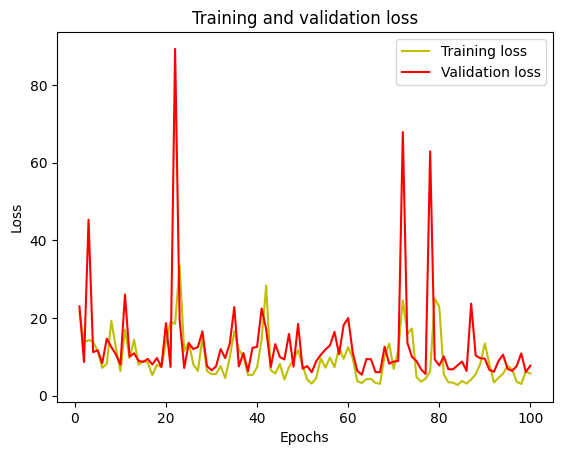

In [24]:
#plot the training and validation accuracy and loss at each epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

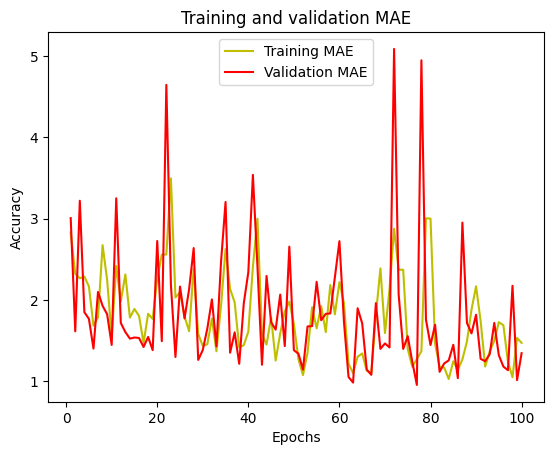

In [25]:
# Plot the training and validation mean absolute error at each epoch

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Twitter sentiment Analysis

**Step 1: Import Libraries**

In [26]:
# Import necessary libraries for data manipulation, visualization, and NLP processing

import pandas as pd
import string
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.utils import pad_sequences

**Step 2: Load Data from kaggle [Dateset link](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis)**

In [34]:
# Load the twitter dataset

df = pd.read_csv("twitter_training.csv")

In [35]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


**Step 3: Data Preprocessing**

In [36]:
# Drop unnecessary columns and rename the columns for better readability

df = df.iloc[:, 2:]
df.columns = ['label', 'data']

In [37]:
# Displaying the unique values at the label column
df.label.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

**Step 4: Handle Missing Values**

In [32]:
# checking for null values
df.isna().sum()

label      0
data     686
dtype: int64